**Librerías**



In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [176]:
#Primero importamos las liibrerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


*A continuación, se realiza un análisis descriptivo de la población mayor de 59 años en la ENUT (2021), la variable demanda de cuidado asociada a éstos y la relación entre la demanda de cuidado y otras variables.*


Base de datos

In [ ]:
#levantamos la base de datos desde la terminal (git clone https://github.com/ximedlf/PAECIS---Final-Grupo-12-.git)


In [8]:
df_base_enut = pd.read_csv("enut2021_base.txt", delimiter="|")  
print(df.head())

       ID  WHOG   WPER  REGION  N_MIEMBRO  BHCV01  BHCV02  BHCV03  BHCV04  \
0  112610   778   1580       1          1       4       1       1       2   
1  138176  1669   2175       1          1       4       2       1       8   
2  192097  1891   5078       1          1       4       2       1       8   
3  185333  1853   2182       1          1       4       2       1       1   
4  113350  1974  10202       1          3       4       4       1       1   

   BHCV05  ...  TP_ACT_CUIDADO_SALUD_65YMAS  \
0       1  ...                            0   
1       1  ...                            0   
2       1  ...                            0   
3       1  ...                            0   
4       1  ...                            0   

   TP_ACT_CUIDADO_TRASLADOS_DISCAPACIDAD  TP_ACT_CUIDADO_TRASLADOS_0A13  \
0                                      0                              0   
1                                      0                              0   
2                            

In [29]:
#Describimos la estructura de la tabla
estructura_tabla = df_base_enut.shape

In [33]:
#Describimos cuántas filas y cuántas columnas tiene
def leer_estructura_tabla(df):
    estructura_tabla = df.shape
    print('La tabla tiene',estructura_tabla[0],'filas')
    print('La tabla tiene',estructura_tabla[1],'columnas')

leer_estructura_tabla(df_base_enut)

La tabla tiene 14350 filas
La tabla tiene 327 columnas


In [34]:
#Enumeramos las variables que tiene
data.columns.tolist()

['ID',
 'CONDICION_ACTIVIDAD_AGRUPADA',
 'WPER',
 'BHCV01',
 'BHCV02',
 'BHCV03',
 'BHCV04',
 'BHCV05',
 'EDAD_SEL',
 'GRUPO_EDAD_SEL',
 'SEXO_SEL',
 'BHCH08_SEL',
 'NIVEL_EDUCATIVO_AGRUPADO',
 'BHCH14_01_SEL',
 'BHCH14_02_SEL',
 'BHCH14_03_SEL',
 'BHCH14_04_SEL',
 'BHCH14_05_SEL',
 'BHCH14_06_SEL',
 'BHCH14_07_SEL',
 'BHCH14_99_SEL',
 'CANT_MIEMBROS_HOGAR',
 'BHDC_SEL',
 'BHSL01_SEL',
 'BHSL02_SEL',
 'BHSL03_SEL',
 'BHSL04_SEL',
 'BHSL05_SEL',
 'BHSL06_SEL',
 'BHSL07_SEL',
 'edad_recodificada',
 'INMAT']

In [35]:
df_base_enut.head(20)

,ID,WHOG,WPER,REGION,N_MIEMBRO,BHCV01,BHCV02,BHCV03,BHCV04,BHCV05,...,TP_ACT_CUIDADO_SALUD_65YMAS,TP_ACT_CUIDADO_TRASLADOS_DISCAPACIDAD,TP_ACT_CUIDADO_TRASLADOS_0A13,TP_ACT_CUIDADO_TRASLADOS_14A64,TP_ACT_CUIDADO_TRASLADOS_65YMAS,TP_ACT_CUIDADO_OTROS_DISCAPACIDAD,TP_ACT_CUIDADO_OTROS_0A13,TP_ACT_CUIDADO_OTROS_14A64,TP_ACT_CUIDADO_OTROS_65YMAS,TP_ACT_CUIDADO_APOYO_0A13
0,112610,778,1580,1,1,4,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1,138176,1669,2175,1,1,4,2,1,8,1,...,0,0,0,0,0,0,0,0,0,0
2,192097,1891,5078,1,1,4,2,1,8,1,...,0,0,0,0,0,0,0,0,0,0
3,185333,1853,2182,1,1,4,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,113350,1974,10202,1,3,4,4,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,169049,3012,3960,1,1,4,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
6,178511,2948,7956,1,2,4,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,117561,4516,2900,1,1,4,4,1,8,1,...,0,0,0,0,0,0,0,0,0,0
8,126084,2454,16928,1,3,4,3,1,2,1,...,0,0,0,0,0,0,0,0,0,0
9,133384,552,500,1,1,4,1,1,8,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Obtenemos un resumen de la información del DataFrame
print(df_base_enut.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14350 entries, 0 to 14349
Columns: 327 entries, ID to TP_ACT_CUIDADO_APOYO_0A13
dtypes: float64(129), int64(198)
memory usage: 35.8 MB
None


In [37]:
# Describimos estadísticas básicas
print(df_base_enut.describe())

                  ID          WHOG          WPER        REGION     N_MIEMBRO  \
count   14350.000000  14350.000000  14350.000000  14350.000000  14350.000000   
mean   149795.960418    645.378188   1612.937700      3.138467      1.644948   
std     29023.694386    849.588046   2438.797686      1.669832      0.943745   
min    100000.000000     23.000000     28.000000      1.000000      1.000000   
25%    124723.000000    184.000000    378.000000      2.000000      1.000000   
50%    149900.500000    309.000000    768.000000      3.000000      1.000000   
75%    175143.250000    696.000000   1675.750000      5.000000      2.000000   
max    200000.000000   5703.000000  26602.000000      6.000000     11.000000   

             BHCV01        BHCV02        BHCV03        BHCV04        BHCV05  \
count  14350.000000  14350.000000  14350.000000  14350.000000  14350.000000   
mean       1.603136      2.996376      1.113868      2.868641      1.909756   
std        1.213178      1.188599      0.3

In [38]:
#Vemos cuántas personas tenemos por edad, para saber si los cv me dan para extraer algún tipo de conclusión
#Según el diseño de registro de la encuesta la variable edad es la siguiente:p EDAD_SEL ¿Cuál es su edad en años cumplidos?
#o EDAD_SEL [Edad]
#p GRUPO_EDAD_SEL Grupo de Edad
#wper es el factor de expansión de las personas
#según el chat gpt debemos importar:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
#Seleccionamos solo las columnas que nos interesan
base_tf=df_base_enut[['ID','WHOG',
'WPER',
                      'REGION',
'BHCV01',
'BHCV02',
'BHCV03',
'BHCV04',
'BHCV05',
'BHCV06',
'BHCV07',
'BHCV08',
'BHCV09',
'BHCV10',
'BHCV11',
'BHHO01',
'EDAD_SEL',
'GRUPO_EDAD_SEL',
'SEXO_SEL',
'BHCH08_SEL',
'NIVEL_EDUCATIVO_SEL',
'NIVEL_EDUCATIVO_AGRUPADO',
'BHCH14_01_SEL',
'CONDICION_ACTIVIDAD_AGRUPADA',
'BHCH14_02_SEL',
'BHCH14_03_SEL',
'BHCH14_04_SEL',
'BHCH14_05_SEL',
'BHCH14_06_SEL',
'BHCH14_07_SEL',
'BHCH14_99_SEL',
'BHCH15_SEL',
'CANT_MIEMBROS_HOGAR',
'BHDC_SEL',
'BHSL01_SEL',
'BHSL02_SEL',
'BHSL03_SEL',
'BHSL04_SEL',
'BHSL05_SEL',
'BHSL06_SEL',
'BHSL07_SEL',
'BHTD01_03',
'BHTD01_04',
'BHTD01_05'



]]


In [40]:
#Enumeramos las variables que tiene
base_tf.columns.tolist()

['ID',
 'WHOG',
 'WPER',
 'REGION',
 'BHCV01',
 'BHCV02',
 'BHCV03',
 'BHCV04',
 'BHCV05',
 'BHCV06',
 'BHCV07',
 'BHCV08',
 'BHCV09',
 'BHCV10',
 'BHCV11',
 'BHHO01',
 'EDAD_SEL',
 'GRUPO_EDAD_SEL',
 'SEXO_SEL',
 'BHCH08_SEL',
 'NIVEL_EDUCATIVO_SEL',
 'NIVEL_EDUCATIVO_AGRUPADO',
 'BHCH14_01_SEL',
 'CONDICION_ACTIVIDAD_AGRUPADA',
 'BHCH14_02_SEL',
 'BHCH14_03_SEL',
 'BHCH14_04_SEL',
 'BHCH14_05_SEL',
 'BHCH14_06_SEL',
 'BHCH14_07_SEL',
 'BHCH14_99_SEL',
 'BHCH15_SEL',
 'CANT_MIEMBROS_HOGAR',
 'BHDC_SEL',
 'BHSL01_SEL',
 'BHSL02_SEL',
 'BHSL03_SEL',
 'BHSL04_SEL',
 'BHSL05_SEL',
 'BHSL06_SEL',
 'BHSL07_SEL',
 'BHTD01_03',
 'BHTD01_04',
 'BHTD01_05']

In [41]:
#Seleccionamos a las personas de 60 años o más
df_personas_mayores=base_tf[base_tf['EDAD_SEL'] > 59]
print(df_personas_mayores)

           ID  WHOG  WPER  REGION  BHCV01  BHCV02  BHCV03  BHCV04  BHCV05  \
9      133384   552   500       1       4       1       1       8       1   
19     188145  1901  1654       1       4       3       1       1       1   
20     189430  1673  4947       1       4       4       1       2       1   
28     173659  2380  5193       1       4       2       1       1       1   
29     123528  1002  1139       1       4       2       1       2       1   
...       ...   ...   ...     ...     ...     ...     ...     ...     ...   
14325  162940    86   101       6       1       4       1       4       1   
14333  137743   184   451       6       1       5       1       4       1   
14341  180487   125   158       6       1       2       1       4       1   
14346  149883   199   423       6       4       1       1       4       1   
14348  198186   199   423       6       1       2       1       4       1   

       BHCV06  ...  BHSL01_SEL  BHSL02_SEL  BHSL03_SEL  BHSL04_SEL  \
9    

In [42]:
#Vemos cantidades de personas en edades simples sin ponderar
df_personas_mayores['GRUPO_EDAD_SEL'].value_counts()
df_personas_mayores['WPER'].value_counts()
df_personas_mayores['EDAD_SEL'].value_counts()


EDAD_SEL
60    236
65    228
64    224
62    207
70    199
68    197
63    195
67    177
73    176
61    170
66    163
69    157
72    155
71    143
75    116
74    115
76    105
80     92
78     92
77     91
79     62
83     56
81     53
82     52
84     51
85     42
86     29
87     26
88     25
90     22
89     19
91      9
93      7
95      6
94      6
92      6
96      3
97      2
Name: count, dtype: int64

In [43]:
#Definimos una función para automatizar el proceso de ponderación

def calcular_frecuencias_ponderadas(df, columna_categoria, columna_peso):
    # Agrupar por la columna categórica y sumar los pesos
    frecuencias_ponderadas = df.groupby(columna_categoria)[columna_peso].sum().reset_index()
    frecuencias_ponderadas.columns = [columna_categoria, 'frecuencia_ponderada']
    return frecuencias_ponderadas

In [44]:
frecuencias_ponderadas_edad = calcular_frecuencias_ponderadas(df_personas_mayores, 'EDAD_SEL', 'WPER')
print(frecuencias_ponderadas_edad)


    EDAD_SEL  frecuencia_ponderada
0         60                332152
1         61                212418
2         62                334181
3         63                281119
4         64                295104
5         65                376206
6         66                252701
7         67                257664
8         68                268382
9         69                160565
10        70                252215
11        71                220453
12        72                191150
13        73                210105
14        74                144596
15        75                120191
16        76                137667
17        77                136543
18        78                104940
19        79                 73940
20        80                106259
21        81                 58886
22        82                 53437
23        83                 91978
24        84                 65703
25        85                 58915
26        86                 29185
27        87        

In [47]:
#Recodificamos la variable edad en 2 grupos
conditions = [(df_personas_mayores['EDAD_SEL'] > 59) & (df_personas_mayores['EDAD_SEL'] <= 74),
    (df_personas_mayores['EDAD_SEL'] > 74)]
choices = ['60 a 74 años','75 años y más']

# Aplicamos la recodificación
df_personas_mayores['GRUPO_AM'] = pd.cut(df_personas_mayores['EDAD_SEL'], bins=[60, 75, float('inf')], labels=choices, right=False)

print(df_personas_mayores)

           ID  WHOG  WPER  REGION  BHCV01  BHCV02  BHCV03  BHCV04  BHCV05  \
9      133384   552   500       1       4       1       1       8       1   
19     188145  1901  1654       1       4       3       1       1       1   
20     189430  1673  4947       1       4       4       1       2       1   
28     173659  2380  5193       1       4       2       1       1       1   
29     123528  1002  1139       1       4       2       1       2       1   
...       ...   ...   ...     ...     ...     ...     ...     ...     ...   
14325  162940    86   101       6       1       4       1       4       1   
14333  137743   184   451       6       1       5       1       4       1   
14341  180487   125   158       6       1       2       1       4       1   
14346  149883   199   423       6       4       1       1       4       1   
14348  198186   199   423       6       1       2       1       4       1   

       BHCV06  ...  BHSL02_SEL  BHSL03_SEL  BHSL04_SEL  BHSL05_SEL  \
9    

C:\Users\UsuarioFundar\AppData\Local\Temp\ipykernel_49540\1866499844.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personas_mayores['GRUPO_AM'] = pd.cut(df_personas_mayores['EDAD_SEL'], bins=[60, 75, float('inf')], labels=choices, right=False)


In [48]:
#Vemos frecuencia simple de grupo por edad
frecuencias_ponderadas_edad_agrupada = calcular_frecuencias_ponderadas(df_personas_mayores, 'GRUPO_AM', 'WPER')
print(frecuencias_ponderadas_edad_agrupada)


        GRUPO_AM  frecuencia_ponderada
0   60 a 74 años               3789011
1  75 años y más               1193981


C:\Users\UsuarioFundar\AppData\Local\Temp\ipykernel_49540\2499550289.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frecuencias_ponderadas = df.groupby(columna_categoria)[columna_peso].sum().reset_index()


In [49]:
# Convertimos a DataFrame
conteo_df=frecuencias_ponderadas_edad_agrupada.reset_index()

In [50]:
conteo_df.columns= ['ID_EDAD','Grupo de edad', 'frecuencia_ponderada']

In [52]:
#Lo guardamos como tabla de excel
conteo_df.to_excel('conteo_personas_mayores_agrup.xlsx', index=False)

In [53]:
#frecuencia region grupo
tabla_cruzada = pd.pivot_table(df_personas_mayores, values='WPER', index='REGION', columns='GRUPO_AM', aggfunc='sum', fill_value=0)

# Normalizamos para obtener proporciones por cada región (opcional)
proporciones = tabla_cruzada.div(tabla_cruzada.sum(axis=1), axis=0)

# Mostramos los resultados

print(proporciones)

GRUPO_AM  60 a 74 años  75 años y más
REGION                               
1             0.754841       0.245159
2             0.751986       0.248014
3             0.762202       0.237798
4             0.862288       0.137712
5             0.742536       0.257464
6             0.801188       0.198812


In [54]:
# Etiquetamos las regiones
etiquetas_regiones = {
    1: 'Gran Buenos Aires',
    2: 'Pampeana',
    3: 'Noroeste',
    4: 'Noreste',
    5: 'Cuyo',
    6: 'Patagonia'
}

# Asignamos las etiquetas descriptivas al índice de proporciones
proporciones.rename(index=etiquetas_regiones, inplace=True)

# Mostramos los resultados actualizados
print(proporciones)


GRUPO_AM           60 a 74 años  75 años y más
REGION                                        
Gran Buenos Aires      0.754841       0.245159
Pampeana               0.751986       0.248014
Noroeste               0.762202       0.237798
Noreste                0.862288       0.137712
Cuyo                   0.742536       0.257464
Patagonia              0.801188       0.198812


Ahora, nuestro primer gráfico: miramos la distribución de nuestros dos grupos etarios según regiones

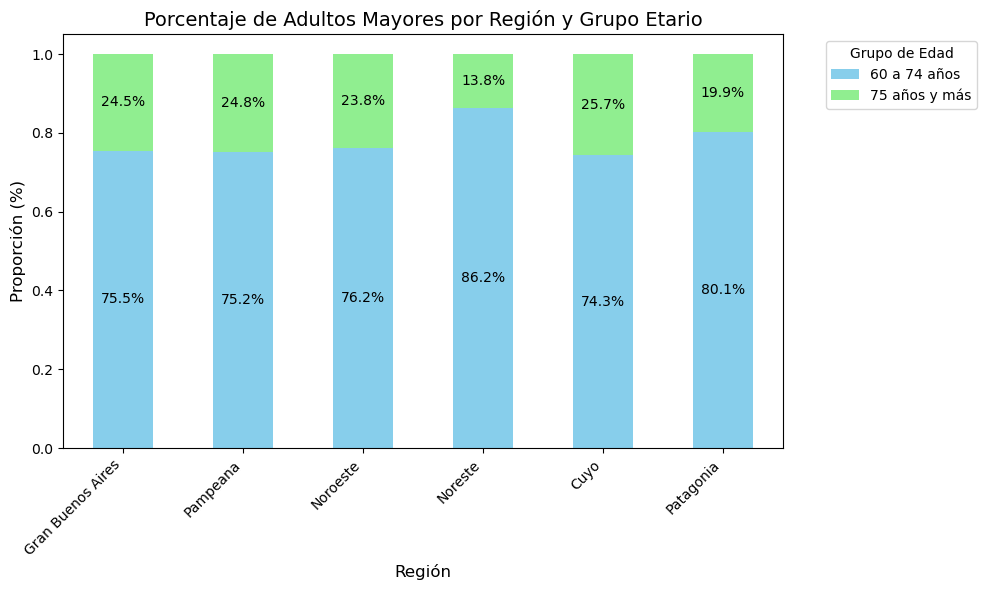

In [55]:
# Normalizamps para que cada fila sume 1
proporciones_normalizadas = proporciones.div(proporciones.sum(axis=1), axis=0)

# Creamos el gráfico de barras apiladas
ax = proporciones_normalizadas.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen'])

# Añadimos etiquetas y título
plt.title('Porcentaje de Adultos Mayores por Región y Grupo Etario', fontsize=14)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Proporción (%)', fontsize=12)

# Nos aseguramos de que las etiquetas del eje X correspondan a las regiones
ax.set_xticks(range(len(proporciones_normalizadas.index)))
ax.set_xticklabels(proporciones_normalizadas.index, rotation=45, ha='right')

# Añadimos leyenda para los grupos de edad
plt.legend(title="Grupo de Edad", bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadimos etiquetas de porcentaje encima de cada barra
for container in ax.containers:
    # Convertir a porcentajes
    labels = [f'{v * 100:.1f}%' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10)

# Ajustamos diseño y mostramos el gráfico
plt.tight_layout()
plt.show()


Comencemos a explorar nuestra variable central: Demandante de cuidado (que en la base se llama BHDC_SEL)

In [56]:
#Vemos porcentajes de demandantes de cuidado (BHDC_SEL)

# La etoquetamos
etiquetas_cuidado = {0: 'No', 1: 'Sí'}

# Calculamos las frecuencias ponderadas
frecuencias_ponderadas_cuidado = df_personas_mayores.groupby(['GRUPO_AM', 'BHDC_SEL'])['WPER'].sum().reset_index()
frecuencias_ponderadas_cuidado.columns = ['Grupo de edad', 'Demandante de cuidado', 'Frecuencia Ponderada']

# Reemplazamos los valores de la variable 'Demandante de cuidado' con las etiquetas
frecuencias_ponderadas_cuidado['Demandante de cuidado'] = frecuencias_ponderadas_cuidado['Demandante de cuidado'].map(etiquetas_cuidado)

# Calculamos las frecuencias ponderadas totales para cada grupo de edad
frecuencias_ponderadas_totales = frecuencias_ponderadas_cuidado.groupby('Grupo de edad')['Frecuencia Ponderada'].sum().reset_index()
frecuencias_ponderadas_totales.columns = ['Grupo de edad', 'Frecuencia Ponderada Total']

# Mergeamos las frecuencias totales con las frecuencias ponderadas originales
frecuencias_ponderadas_cuidado = frecuencias_ponderadas_cuidado.merge(frecuencias_ponderadas_totales, on='Grupo de edad')

# Calculamos el porcentaje
frecuencias_ponderadas_cuidado['Porcentaje'] = (frecuencias_ponderadas_cuidado['Frecuencia Ponderada'] / frecuencias_ponderadas_cuidado['Frecuencia Ponderada Total']) * 100

# Renombramos la columna del grupo de edad
columna_a_renombrar = frecuencias_ponderadas_cuidado.columns[0]
frecuencias_ponderadas_cuidado = frecuencias_ponderadas_cuidado.rename(columns={columna_a_renombrar: 'Etiqueta de Grupo de Edad'})

# Imprimimos el dataframe resultante
print(frecuencias_ponderadas_cuidado)


  Etiqueta de Grupo de Edad Demandante de cuidado  Frecuencia Ponderada  \
0              60 a 74 años                    No               3636360   
1              60 a 74 años                    Sí                152651   
2             75 años y más                    No                980344   
3             75 años y más                    Sí                213637   

   Frecuencia Ponderada Total  Porcentaje  
0                     3789011   95.971218  
1                     3789011    4.028782  
2                     1193981   82.107169  
3                     1193981   17.892831  


C:\Users\UsuarioFundar\AppData\Local\Temp\ipykernel_49540\1480544786.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frecuencias_ponderadas_cuidado = df_personas_mayores.groupby(['GRUPO_AM', 'BHDC_SEL'])['WPER'].sum().reset_index()
C:\Users\UsuarioFundar\AppData\Local\Temp\ipykernel_49540\1480544786.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frecuencias_ponderadas_totales = frecuencias_ponderadas_cuidado.groupby('Grupo de edad')['Frecuencia Ponderada'].sum().reset_index()


Veamos entonces ahora en un gráfico de barras la condición de ser demandante de cuidado para nuestros dos grupos de edad (el resultado no les sorprenderá)

c:\Users\UsuarioFundar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\UsuarioFundar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


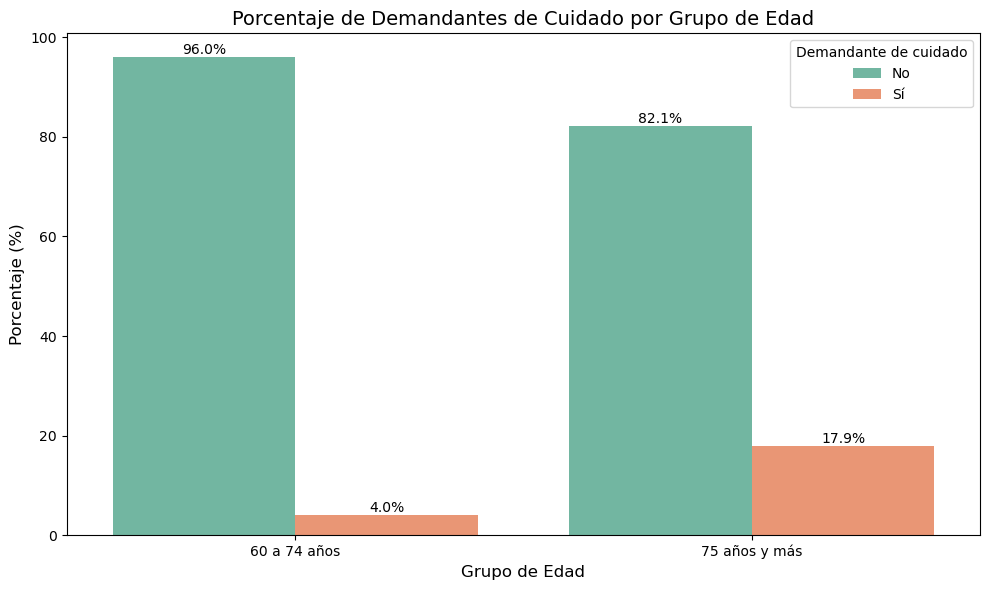

In [57]:
# Creamos un gráfico de barras usando seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Etiqueta de Grupo de Edad', y='Porcentaje', hue='Demandante de cuidado', data=frecuencias_ponderadas_cuidado, palette='Set2')

# Añadimos título y etiquetas a los ejes
plt.title('Porcentaje de Demandantes de Cuidado por Grupo de Edad', fontsize=14)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)

# Mostramos las etiquetas de porcentaje en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)

# Ajustamos la visualización
plt.tight_layout()
plt.show()


In [58]:
# Convertimos a DataFrame
conteo_df_cuidado=frecuencias_ponderadas_cuidado.reset_index()

In [59]:
#Guardamos la tabla en excel
conteo_df_cuidado.to_excel('conteo_personas_mayores_cuidado.xlsx', index=False)

In [60]:
# Etiquetamos nuevamente la variable BHDC_SEL
etiquetas_cuidado = {0: 'No', 1: 'Sí'}

# Calculamos las frecuencias ponderadas por grupo de edad, sexo y demanda de cuidado 
frecuencias_ponderadas_cuidado = df_personas_mayores.groupby(['GRUPO_AM', 'SEXO_SEL', 'BHDC_SEL'])['WPER'].sum().reset_index()
frecuencias_ponderadas_cuidado.columns = ['Grupo de edad', 'Sexo', 'Demandante de cuidado', 'Frecuencia Ponderada']

# Reemplazamos los valores de la variable 'Demandante de cuidado' con las etiquetas
frecuencias_ponderadas_cuidado['Demandante de cuidado'] = frecuencias_ponderadas_cuidado['Demandante de cuidado'].map(etiquetas_cuidado)

# Calculamos las frecuencias ponderadas totales para cada grupo de edad y sexo
frecuencias_ponderadas_totales = frecuencias_ponderadas_cuidado.groupby(['Grupo de edad', 'Sexo'])['Frecuencia Ponderada'].sum().reset_index()
frecuencias_ponderadas_totales.columns = ['Grupo de edad', 'Sexo', 'Frecuencia Ponderada Total']

# Mergeamos las frecuencias totales con las frecuencias ponderadas originales
frecuencias_ponderadas_cuidado = frecuencias_ponderadas_cuidado.merge(frecuencias_ponderadas_totales, on=['Grupo de edad', 'Sexo'])

# Calculamos el porcentaje
frecuencias_ponderadas_cuidado['Porcentaje'] = (frecuencias_ponderadas_cuidado['Frecuencia Ponderada'] / frecuencias_ponderadas_cuidado['Frecuencia Ponderada Total']) * 100

# Renombramos la columna para una mejor comprensión
frecuencias_ponderadas_cuidado = frecuencias_ponderadas_cuidado.rename(columns={'Grupo de edad': 'Etiqueta de Grupo de Edad'})

# Imprimimos el resultado
print(frecuencias_ponderadas_cuidado)


  Etiqueta de Grupo de Edad  Sexo Demandante de cuidado  Frecuencia Ponderada  \
0              60 a 74 años     1                    No               2037446   
1              60 a 74 años     1                    Sí                100402   
2              60 a 74 años     2                    No               1598914   
3              60 a 74 años     2                    Sí                 52249   
4             75 años y más     1                    No                526976   
5             75 años y más     1                    Sí                153871   
6             75 años y más     2                    No                453368   
7             75 años y más     2                    Sí                 59766   

   Frecuencia Ponderada Total  Porcentaje  
0                     2137848   95.303595  
1                     2137848    4.696405  
2                     1651163   96.835624  
3                     1651163    3.164376  
4                      680847   77.400062  
5     

C:\Users\UsuarioFundar\AppData\Local\Temp\ipykernel_49540\2429539505.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frecuencias_ponderadas_cuidado = df_personas_mayores.groupby(['GRUPO_AM', 'SEXO_SEL', 'BHDC_SEL'])['WPER'].sum().reset_index()
C:\Users\UsuarioFundar\AppData\Local\Temp\ipykernel_49540\2429539505.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frecuencias_ponderadas_totales = frecuencias_ponderadas_cuidado.groupby(['Grupo de edad', 'Sexo'])['Frecuencia Ponderada'].sum().reset_index()


Ahora queremos ver cómo se comporta la demanda de cuidado para esos dos grupos de edad, pero por sexo

In [61]:
# Etiquetamos la variable Sexo
frecuencias_ponderadas_cuidado['Sexo'] = frecuencias_ponderadas_cuidado['Sexo'].map({1: 'Mujer', 2: 'Varón'})

# Verificamos que las etiquetas se asignaron correctamente
print(frecuencias_ponderadas_cuidado['Sexo'].unique())


['Mujer' 'Varón']


C:\Users\UsuarioFundar\AppData\Local\Temp\ipykernel_49540\3185188694.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
c:\Users\UsuarioFundar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\UsuarioFundar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\UsuarioFundar\AppData\Local\Temp\ipykernel_49540\3185188694.py:11: FutureWarning: 

The `ci` parame

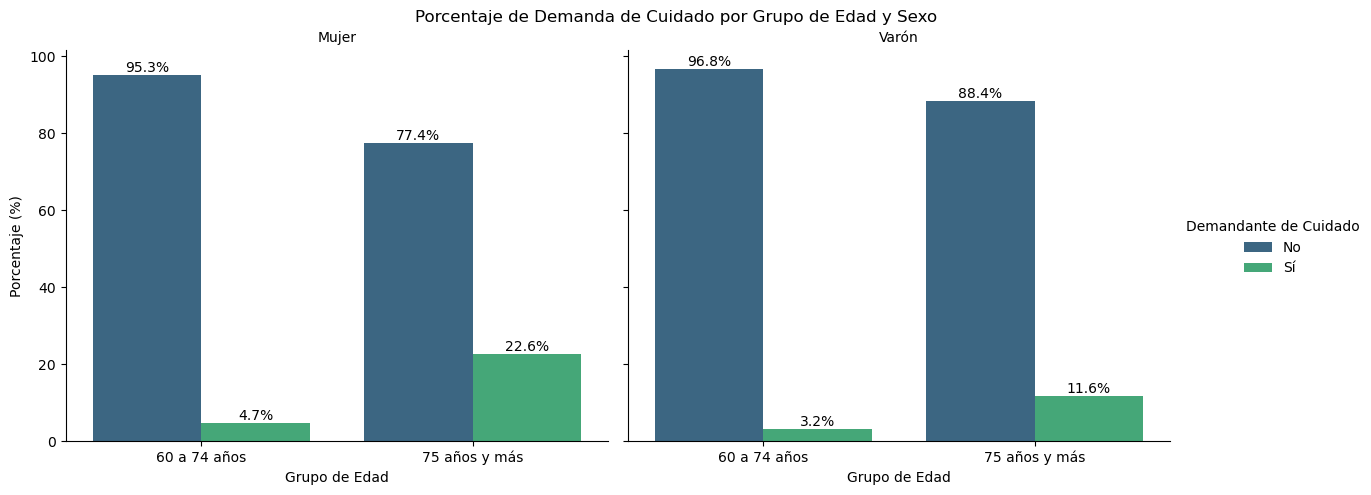

In [62]:
# Creamos un FacetGrid para separar gráficos por Sexo
g = sns.FacetGrid(
    data=frecuencias_ponderadas_cuidado,
    col='Sexo',  # Una faceta por sexo
    height=5,
    aspect=1.2
)

# Función personalizada para agregar etiquetas a las barras
def add_labels(data, **kwargs):
    sns.barplot(
        x='Etiqueta de Grupo de Edad',
        y='Porcentaje',
        hue='Demandante de cuidado',
        ci=None,
        palette='viridis',
        data=data,
        **kwargs
    )
    # Agregamos etiquetas a las barras
    ax = plt.gca()  # Obtener el eje actual
    for container in ax.containers:
        # Iterar sobre las barras en el contenedor
        for bar in container:
            # Obtener las coordenadas y valor de cada barra
            height = bar.get_height()
            if height > 0:  # Para evitar etiquetas en barras de valor 0
                ax.text(
                    bar.get_x() + bar.get_width() / 2,  # Posición x
                    height,  # Posición y
                    f"{height:.1f}%",  # Texto (valor con formato de porcentaje)
                    ha='center',  # Alineación horizontal
                    va='bottom',  # Alineación vertical
                    fontsize=10  # Tamaño de fuente
                )

# Dibujamos gráficos de barras apiladas en cada faceta
g.map_dataframe(add_labels)

# Ajustamos leyendas y títulos
g.add_legend(title='Demandante de Cuidado')
g.set_axis_labels("Grupo de Edad", "Porcentaje (%)")
g.set_titles("{col_name}")  # Título por faceta

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Porcentaje de Demanda de Cuidado por Grupo de Edad y Sexo")
plt.show()


Y sin mirar por edades? (Las mujeres demandan más cuidado que los varones)

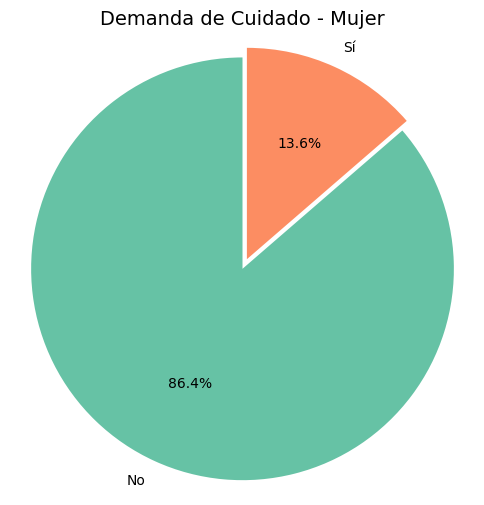

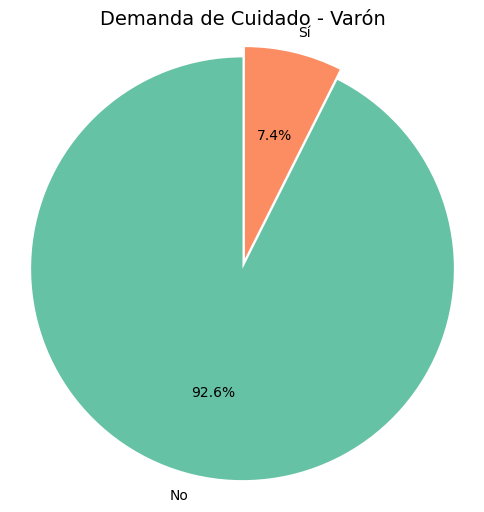

In [63]:
import matplotlib.pyplot as plt

# Configuración inicial
sexos = frecuencias_ponderadas_cuidado['Sexo'].unique()  # Obtener categorías de la variable Sexo

# Iteramos por cada categoría de Sexo y generamos un gráfico de torta
for sexo in sexos:
    # Filtramos datos para cada sexo
    datos_sexo = frecuencias_ponderadas_cuidado[frecuencias_ponderadas_cuidado['Sexo'] == sexo]

    # Agrupamos por "Demandante de cuidado" y calcular el porcentaje total
    datos_agrupados = datos_sexo.groupby('Demandante de cuidado')['Porcentaje'].sum()

    # Creamos el gráfico de torta
    plt.figure(figsize=(6, 6))
    plt.pie(
        datos_agrupados,
        labels=datos_agrupados.index,
        autopct='%1.1f%%',  # Mostrar porcentajes en el gráfico
        startangle=90,      # Comenzar el gráfico desde la parte superior
        colors=['#66c2a5', '#fc8d62'],  # Colores personalizados
        explode=[0.05, 0]  # Separar ligeramente la primera sección (opcional)
    )

    # Añadimos título
    plt.title(f"Demanda de Cuidado - {sexo}", fontsize=14)
    plt.axis('equal')  # Asegurar que el gráfico sea un círculo perfecto

    # Mostramos el gráfico
    plt.show()


Y por condición de actividad?

In [64]:
# Recodificamos la condición de actividad (1 = Ocupado, 2 = No Ocupado)
df_personas_mayores['Condición de Actividad'] = df_personas_mayores['CONDICION_ACTIVIDAD_AGRUPADA'].map({1: 'Ocupado', 2: 'No Ocupado'})

# Calculamos las frecuencias ponderadas por condición de actividad y demanda de cuidado
frecuencias_ponderadas_actividad = df_personas_mayores.groupby(['Condición de Actividad', 'BHDC_SEL'])['WPER'].sum().reset_index()
frecuencias_ponderadas_actividad.columns = ['Condición de Actividad', 'Demandante de cuidado', 'Frecuencia Ponderada']

# Calculamos las frecuencias ponderadas totales por condición de actividad
frecuencias_ponderadas_totales_actividad = frecuencias_ponderadas_actividad.groupby(['Condición de Actividad'])['Frecuencia Ponderada'].sum().reset_index()
frecuencias_ponderadas_totales_actividad.columns = ['Condición de Actividad', 'Frecuencia Ponderada Total']

# Mergeamos las frecuencias totales con las frecuencias ponderadas originales
frecuencias_ponderadas_actividad = frecuencias_ponderadas_actividad.merge(frecuencias_ponderadas_totales_actividad, on=['Condición de Actividad'])

# Calculamos el porcentaje
frecuencias_ponderadas_actividad['Porcentaje'] = (frecuencias_ponderadas_actividad['Frecuencia Ponderada'] / frecuencias_ponderadas_actividad['Frecuencia Ponderada Total']) * 100

# Imprimimos la tabla final
print(frecuencias_ponderadas_actividad)


  Condición de Actividad  Demandante de cuidado  Frecuencia Ponderada  \
0             No Ocupado                      0               3098969   
1             No Ocupado                      1                324464   
2                Ocupado                      0               1517735   
3                Ocupado                      1                 41824   

   Frecuencia Ponderada Total  Porcentaje  
0                     3423433   90.522262  
1                     3423433    9.477738  
2                     1559559   97.318216  
3                     1559559    2.681784  


C:\Users\UsuarioFundar\AppData\Local\Temp\ipykernel_49540\2667149030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personas_mayores['Condición de Actividad'] = df_personas_mayores['CONDICION_ACTIVIDAD_AGRUPADA'].map({1: 'Ocupado', 2: 'No Ocupado'})


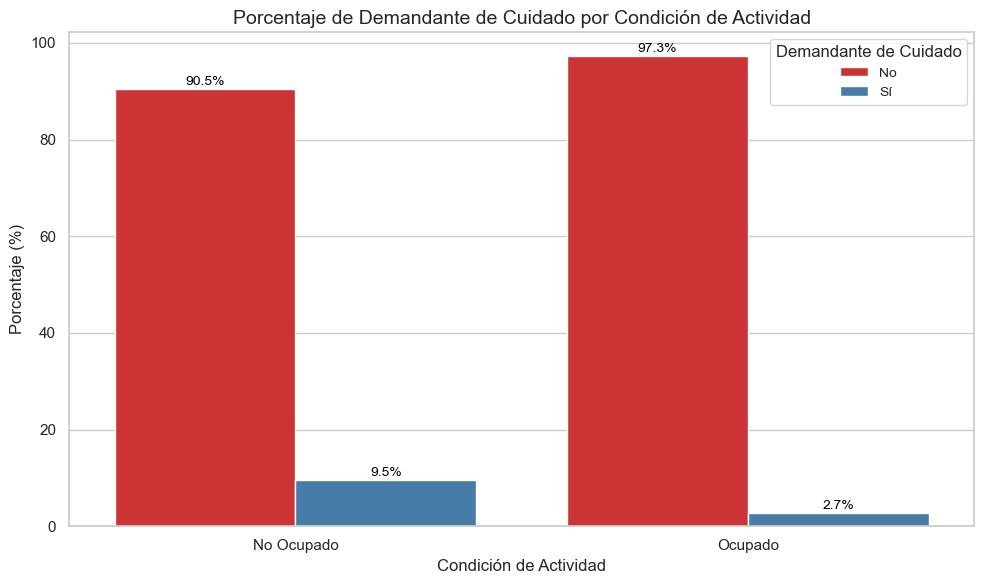

In [65]:
# Establecemos el estilo del gráfico
sns.(style="whitegrid")

# Etiquetamos la variable de 'Demandante de cuidado'
etiquetas_cuidado = {0: 'No', 1: 'Sí'}

# Reemplazamos los valores de la variable 'Demandante de cuidado' con las etiquetas
frecuencias_ponderadas_actividad['Demandante de cuidado'] = frecuencias_ponderadas_actividad['Demandante de cuidado'].map(etiquetas_cuidado)

# Creamos el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=frecuencias_ponderadas_actividad,
                 x='Condición de Actividad',
                 y='Porcentaje',
                 hue='Demandante de cuidado',
                 palette='Set1')

# Agregamos las etiquetas a las barras
for p in ax.patches:
    if p.get_height() > 0:  # Solo mostrar etiquetas si el valor es mayor a 0
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

# Personalizamos el gráfico
ax.set_xlabel('Condición de Actividad', fontsize=12)
ax.set_ylabel('Porcentaje (%)', fontsize=12)
ax.set_title('Porcentaje de Demandante de Cuidado por Condición de Actividad', fontsize=14)

# Mejoramos la leyenda
plt.legend(title='Demandante de Cuidado', loc='upper right', fontsize=10)

# Mostramos el gráfico
plt.tight_layout()
plt.show()



Y por cantidad de miembros en el hogar?

In [67]:
# Recodificamos la cantidad de miembros en el hogar
def recodificar_miembros_hogar(x):
    if x == 1:
        return '1 miembro'
    elif x == 2:
        return '2 miembros'
    elif x == 3:
        return '3 miembros'
    elif x == 4:
        return '4 miembros'
    else:
        return 'Más de 4 miembros'

df_personas_mayores['Cantidad de Miembros en el Hogar'] = df_personas_mayores['CANT_MIEMBROS_HOGAR'].apply(recodificar_miembros_hogar)

# Calculamos las frecuencias ponderadas por cantidad de miembros y demanda de cuidado
frecuencias_ponderadas_miembros = df_personas_mayores.groupby(['Cantidad de Miembros en el Hogar', 'BHDC_SEL'])['WPER'].sum().reset_index()
frecuencias_ponderadas_miembros.columns = ['Cantidad de Miembros en el Hogar', 'Demandante de Cuidado', 'Frecuencia Ponderada']

# Calculamos las frecuencias ponderadas totales por cantidad de miembros en el hogar
frecuencias_ponderadas_totales_miembros = frecuencias_ponderadas_miembros.groupby(['Cantidad de Miembros en el Hogar'])['Frecuencia Ponderada'].sum().reset_index()
frecuencias_ponderadas_totales_miembros.columns = ['Cantidad de Miembros en el Hogar', 'Frecuencia Ponderada Total']

# Mergeamos las frecuencias totales con las frecuencias ponderadas originales
frecuencias_ponderadas_miembros = frecuencias_ponderadas_miembros.merge(frecuencias_ponderadas_totales_miembros, on=['Cantidad de Miembros en el Hogar'])

# Calculamos el porcentaje
frecuencias_ponderadas_miembros['Porcentaje'] = (frecuencias_ponderadas_miembros['Frecuencia Ponderada'] / frecuencias_ponderadas_miembros['Frecuencia Ponderada Total']) * 100

# Imprimimos la tabla final
print(frecuencias_ponderadas_miembros)


  Cantidad de Miembros en el Hogar  Demandante de Cuidado  \
0                        1 miembro                      0   
1                        1 miembro                      1   
2                       2 miembros                      0   
3                       2 miembros                      1   
4                       3 miembros                      0   
5                       3 miembros                      1   
6                       4 miembros                      0   
7                       4 miembros                      1   
8                Más de 4 miembros                      0   
9                Más de 4 miembros                      1   

   Frecuencia Ponderada  Frecuencia Ponderada Total  Porcentaje  
0                900786                      993614   90.657539  
1                 92828                      993614    9.342461  
2               2068348                     2227729   92.845584  
3                159381                     2227729    7.154416 

C:\Users\UsuarioFundar\AppData\Local\Temp\ipykernel_49540\2851714244.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personas_mayores['Cantidad de Miembros en el Hogar'] = df_personas_mayores['CANT_MIEMBROS_HOGAR'].apply(recodificar_miembros_hogar)


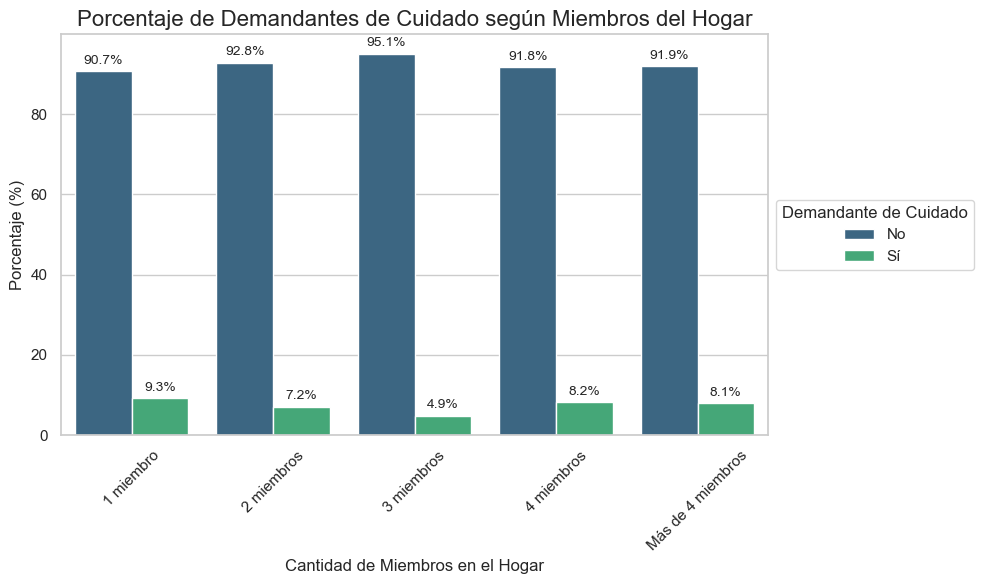

In [68]:
# Primero etiquetamos las categorías de la variable "Demandante de cuidado"
frecuencias_ponderadas_miembros['Demandante de Cuidado'] = frecuencias_ponderadas_miembros['Demandante de Cuidado'].map({0: 'No', 1: 'Sí'})

# Configuramos el estilo del gráfico
sns.set(style="whitegrid")

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
ax = sns.barplot(
    data=frecuencias_ponderadas_miembros,
    x='Cantidad de Miembros en el Hogar',
    y='Porcentaje',
    hue='Demandante de Cuidado',
    palette='viridis'  # Paleta de colores
)

# Añadimos etiquetas a las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=10)  # Formato de porcentaje y tamaño de fuente

# Añadimos etiquetas y título
ax.set_title('Porcentaje de Demandantes de Cuidado según Miembros del Hogar', fontsize=16)
ax.set_xlabel('Cantidad de Miembros en el Hogar', fontsize=12)
ax.set_ylabel('Porcentaje (%)', fontsize=12)

# Rotamos las etiquetas del eje X si es necesario
plt.xticks(rotation=45)

# Configuramos la posición de la leyenda
plt.legend(title='Demandante de Cuidado', loc='center left', bbox_to_anchor=(1, 0.5))

# Ajustamos el diseño para evitar superposición
plt.tight_layout()

# Mostramos el gráfico
plt.show()



Y por nivel educativo?

C:\Users\UsuarioFundar\AppData\Local\Temp\ipykernel_49540\4281036943.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personas_mayores['NIVEL_EDUCATIVO_AGRUPADO'] = df_personas_mayores['NIVEL_EDUCATIVO_AGRUPADO'].replace(etiquetas_educacion)


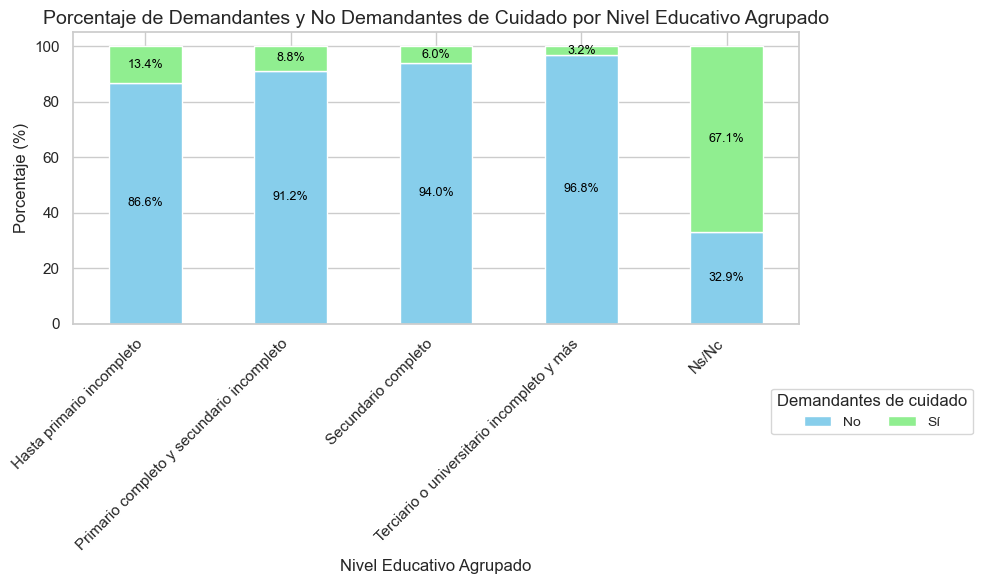

In [69]:
# Etiquetamos las categorías de la variable NIVEL_EDUCATIVO_AGRUPADO
etiquetas_educacion = {
    1: "Hasta primario incompleto",
    2: "Primario completo y secundario incompleto",
    3: "Secundario completo",
    4: "Terciario o universitario incompleto y más",
    99: "Ns/Nc"
}
df_personas_mayores['NIVEL_EDUCATIVO_AGRUPADO'] = df_personas_mayores['NIVEL_EDUCATIVO_AGRUPADO'].replace(etiquetas_educacion)

# Renombramos la variable BHDC_SEL como 'Demandantes de cuidado'
df_personas_mayores = df_personas_mayores.rename(columns={'BHDC_SEL': 'Demandantes de cuidado'})

# Definimos el orden específico para los niveles educativos
orden_educacion = [
    "Hasta primario incompleto",
    "Primario completo y secundario incompleto",
    "Secundario completo",
    "Terciario o universitario incompleto y más",
    "Ns/Nc"
]

# Creamos la tabla cruzada de frecuencias ponderadas
tabla_cruzada = df_personas_mayores.groupby(['Demandantes de cuidado', 'NIVEL_EDUCATIVO_AGRUPADO'])['WPER'].sum().reset_index()

# Calculamos las frecuencias totales por nivel educativo
totales_nivel_educativo = tabla_cruzada.groupby(['NIVEL_EDUCATIVO_AGRUPADO'])['WPER'].sum().reset_index()
totales_nivel_educativo.columns = ['NIVEL_EDUCATIVO_AGRUPADO', 'TOTAL_WPER']

# Hacemos un merge para calcular los porcentajes
tabla_cruzada = tabla_cruzada.merge(totales_nivel_educativo, on='NIVEL_EDUCATIVO_AGRUPADO')
tabla_cruzada['Porcentaje'] = (tabla_cruzada['WPER'] / tabla_cruzada['TOTAL_WPER']) * 100

# Etiquetamos la variable 'Demandantes de cuidado'
tabla_cruzada['Demandantes de cuidado'] = tabla_cruzada['Demandantes de cuidado'].replace({1: 'Sí', 0: 'No'})

# Pivoteamos la tabla para que 'Demandantes de cuidado' se convierta en columnas
tabla_pivot = tabla_cruzada.pivot_table(index='NIVEL_EDUCATIVO_AGRUPADO',
                                        columns='Demandantes de cuidado',
                                        values='Porcentaje',
                                        aggfunc='sum')

# Nos aseguramos de que el orden de las categorías sea el correcto
tabla_pivot = tabla_pivot.loc[orden_educacion]

# Graficamos el porcentaje de demandantes y no demandantes
colores = ['skyblue', 'lightgreen']  # Colores personalizados
ax = tabla_pivot.plot(kind='bar',
                      stacked=True,
                      figsize=(10, 6),
                      color=colores)

# Añadimos etiquetas de porcentaje dentro de cada barra, evitando superposiciones
for container in ax.containers:
    for bar in container:
        altura = bar.get_height()
        if altura > 0:  # Solo si hay un valor positivo
            ax.annotate(f'{altura:.1f}%',
                        (bar.get_x() + bar.get_width() / 2, bar.get_y() + altura / 2),
                        ha='center', va='center',
                        fontsize=9, color='black')

# Configuramos el gráfico
plt.title('Porcentaje de Demandantes y No Demandantes de Cuidado por Nivel Educativo Agrupado', fontsize=14)
plt.xlabel('Nivel Educativo Agrupado', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotación para evitar que se solapen
plt.legend(title='Demandantes de cuidado', loc='upper center', bbox_to_anchor=(1.1, -0.2), fontsize=10, ncol=2)
plt.tight_layout()

# Mostramos el gráfico
plt.show()


Ahora construimos un indicador agregado para calidad de materiales de la vivienda, "INMAT"

In [70]:
def recodificar_inmat(row):
    techo = row['BHCV04']
    cielorraso = row['BHCV05']
    piso = row['BHCV03']

    if techo in [1, 2, 3]:  # Cubierta asfáltica o membrana, Baldosa o losa, Pizarra o teja
        if cielorraso == 1:  # Sí
            if piso == 1:  # Cerámica, baldosa, mosaico, mármol, madera o alfombra
                return 'I'
            elif piso == 2:  # Cemento o ladrillo fijo
                return 'II'
            elif piso == 3:  # Tierra o ladrillo suelto
                return 'IV'
            else:  # Otro
                return 'II'
        else:  # No o Ns/Nc
            if piso == 1 or piso == 2:
                return 'II'
            elif piso == 3:
                return 'IV'
            else:
                return 'III'

    elif techo in [4, 5]:  # Chapa de metal, Chapa de fibrocemento o plástico
        if cielorraso == 1:  # Sí
            if piso == 1 or piso == 2:
                return 'III'
            else:
                return 'IV'
        else:  # No o Ns/Nc
            if piso == 1 or piso == 2:
                return 'III'
            elif piso == 3:
                return 'IV'
            else:
                return 'IV'

    elif techo in [6, 7]:  # Chapa de cartón, Caña, palma, tabla o paja con o sin barro
        return 'IV'

    else:  # Ns/Nc o Otro
        if cielorraso == 1:  # Sí
            if piso in [1, 2]:
                return 'II'
            else:
                return 'IV'
        else:  # No o Ns/Nc
            if piso in [1, 2]:
                return 'III'
            else:
                return 'IV'

In [71]:
# Aplicamos la función para crear la nueva columna INMAT
df_personas_mayores['INMAT'] = df_personas_mayores.apply(recodificar_inmat, axis=1)

# Mostramos las primeras filas del DataFrame para verificar
print(df_personas_mayores)

           ID  WHOG  WPER  REGION  BHCV01  BHCV02  BHCV03  BHCV04  BHCV05  \
9      133384   552   500       1       4       1       1       8       1   
19     188145  1901  1654       1       4       3       1       1       1   
20     189430  1673  4947       1       4       4       1       2       1   
28     173659  2380  5193       1       4       2       1       1       1   
29     123528  1002  1139       1       4       2       1       2       1   
...       ...   ...   ...     ...     ...     ...     ...     ...     ...   
14325  162940    86   101       6       1       4       1       4       1   
14333  137743   184   451       6       1       5       1       4       1   
14341  180487   125   158       6       1       2       1       4       1   
14346  149883   199   423       6       4       1       1       4       1   
14348  198186   199   423       6       1       2       1       4       1   

       BHCV06  ...  BHSL05_SEL  BHSL06_SEL  BHSL07_SEL  BHTD01_03  BHTD01_0

In [72]:
df_personas_mayores = pd.DataFrame(df_personas_mayores)

# Diccionario para pasar los números romanos a las etiquetas de calidad
mapping = {
    'I': '1',
    'II': '2',
    'III': '3',
    'IV': '4'
}

# Recodificamos la columna INMAT utilizando el diccionario
df_personas_mayores['calidad_inmat'] = df_personas_mayores['INMAT'].map(mapping)

# Mostramos las primeras filas del DataFrame para verificar
print(df_personas_mayores)

           ID  WHOG  WPER  REGION  BHCV01  BHCV02  BHCV03  BHCV04  BHCV05  \
9      133384   552   500       1       4       1       1       8       1   
19     188145  1901  1654       1       4       3       1       1       1   
20     189430  1673  4947       1       4       4       1       2       1   
28     173659  2380  5193       1       4       2       1       1       1   
29     123528  1002  1139       1       4       2       1       2       1   
...       ...   ...   ...     ...     ...     ...     ...     ...     ...   
14325  162940    86   101       6       1       4       1       4       1   
14333  137743   184   451       6       1       5       1       4       1   
14341  180487   125   158       6       1       2       1       4       1   
14346  149883   199   423       6       4       1       1       4       1   
14348  198186   199   423       6       1       2       1       4       1   

       BHCV06  ...  BHSL06_SEL  BHSL07_SEL  BHTD01_03  BHTD01_04  BHTD01_05

Grafiquemos nuestra variable construida por demandantes de cuidado!

C:\Users\UsuarioFundar\AppData\Local\Temp\ipykernel_49540\1280095311.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_porcentaje,


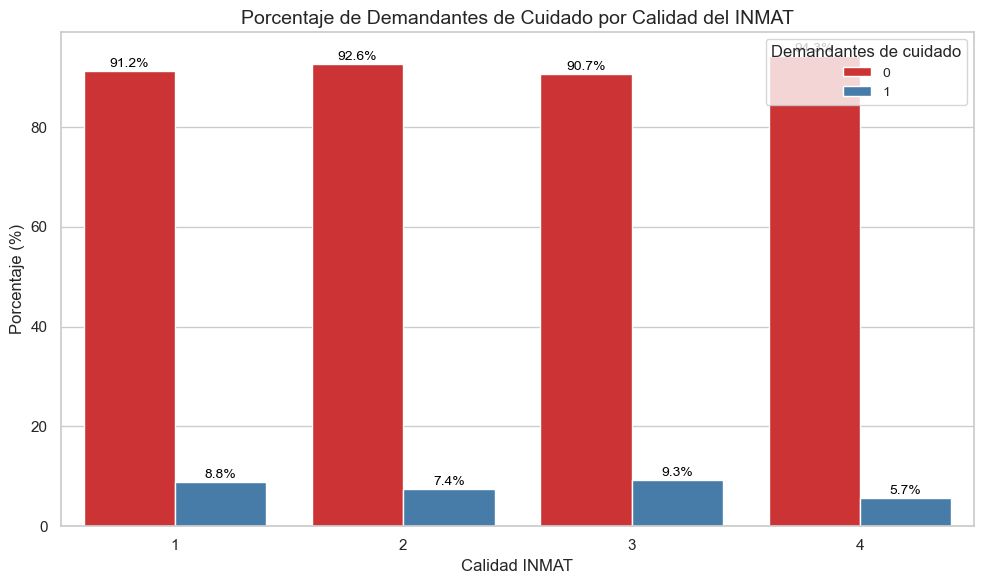

In [77]:
# Nos aseguramos de que el gráfico tenga un tamaño adecuado
plt.figure(figsize=(10, 6))

# Convertimos las columnas relevantes a cadenas
df_porcentaje['calidad_inmat'] = df_porcentaje['calidad_inmat'].astype(str)
df_porcentaje['Demandantes de cuidado'] = df_porcentaje['Demandantes de cuidado'].astype(str)

# Creamos el gráfico de barras
sns.barplot(data=df_porcentaje, 
            x='calidad_inmat', 
            y='Porcentaje', 
            hue='Demandantes de cuidado', 
            ci=None, 
            palette='Set1')

# Añadimos etiquetas de porcentaje encima de cada barra
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       fontsize=10, color='black', 
                       xytext=(0, 5), textcoords='offset points')

# Configuración de etiquetas y título
plt.title('Porcentaje de Demandantes de Cuidado por Calidad del INMAT', fontsize=14)
plt.xlabel('Calidad INMAT', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)

# Ajustamos la leyenda para que no se superponga
plt.legend(title='Demandantes de cuidado', loc='upper right', fontsize=10)

# Ajustamos la visualización
plt.tight_layout()

Preparamos los datos para armar nuestra regresión

In [128]:
# Calculamos los valores faltantes en cada columna
missing_values = df_personas_mayores.isnull().sum()

# Convertimos la serie de valores faltantes a un DataFrame
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Columna', 'Valores Faltantes']

# Imprimimos los valores faltantes en cada columna
print("Valores faltantes en cada columna:")
print(missing_values_df)

# Exportamos el resultado a un archivo Excel
missing_values_df.to_excel("Valores_faltantes.xlsx", index=False)

Valores faltantes en cada columna:
                             Columna  Valores Faltantes
0                                 ID                  0
1                               WHOG                  0
2                               WPER                  0
3                             REGION                  0
4                             BHCV01                  0
5                             BHCV02                  0
6                             BHCV03                  0
7                             BHCV04                  0
8                             BHCV05                  0
9                             BHCV06                  0
10                            BHCV07                  0
11                            BHCV08                  0
12                            BHCV09                  0
13                            BHCV10                 10
14                            BHCV11                 10
15                            BHHO01               3674
16           

In [140]:
# Hacemos dummy a la variable "GRUPO_AM" 
df['GRUPO_AM_dummy'] = np.where(df['GRUPO_AM'] == '75 años y más', 1, 0)

In [144]:
#Eliminamos columnas con valores nulos y aquellas utilizadas para construir INMAT
# Lista de columnas a eliminar (sin espacios adicionales)
columnas_a_eliminar = [
    'BHCH14_01_SEL',
    'BHCH14_01_SEL',
    'BHCH14_02_SEL',
     'BHHO01',
    'BHCH14_03_SEL',
    'BHCH14_04_SEL',
    'BHCH14_05_SEL',
    'BHCH14_06_SEL',
    'BHCH14_07_SEL',
    'BHCH14_99_SEL',
     'BHCV10',
 'BHCV11',
'BHCV02',
'BHCV03',
'BHCV04',
'BHCV05',
    'BHSL02_SEL',
    'BHSL03_SEL',
    'BHSL04_SEL',
     'BHCV08',
    'BHSL05_SEL',
    'BHSL06_SEL',
    'BHSL07_SEL',
    'BHCH15_SEL',
    'BHCV04',
    'BHCV03',
    'BHCV05',
    'WHOG',
     'Condición de Actividad',
     'BHTD01_03',
 'BHTD01_04',
 'BHTD01_05','NIVEL_EDUCATIVO_SEL','EDAD_SEL','GRUPO_EDAD_SEL','INMAT','BHSL01_SEL','ID','WPER','edad_etiquetada', 'Cantidad de Miembros en el Hogar', 'GRUPO_AM']

# Eliminamos columnas del DataFrame
df = df_personas_mayores.drop(columns=columnas_a_eliminar, errors='ignore')

# Mostramos el DataFrame modificado
print(df.head())

    REGION  BHCV01  BHCV06  BHCV07  BHCV09  SEXO_SEL  BHCH08_SEL  \
9        1       4       4       1       1         2           2   
19       1       4       1       1       1         2           2   
20       1       4       4       1       1         1           2   
28       1       4       1       1       1         1           2   
29       1       4       1       1       1         2           2   

                      NIVEL_EDUCATIVO_AGRUPADO  CONDICION_ACTIVIDAD_AGRUPADA  \
9                          Secundario completo                             2   
19  Terciario o universitario incompleto y más                             2   
20  Terciario o universitario incompleto y más                             2   
28                         Secundario completo                             2   
29                         Secundario completo                             1   

    CANT_MIEMBROS_HOGAR  Demandantes de cuidado calidad_inmat  
9                     1                       

In [145]:
df.rename(columns = {
    'BHDC_SEL': 'Demanda_de_cuidado',
    'BHCH08_SEL': 'Asistencia_escolar',
    'BHCV02': 'Ambientes_vivienda',
     'BHCV06': 'Combustible_cocinar',
    'BHCV07': 'Procedencia_agua',
     'BHCV09': 'Tenencia_baño',
     'CONDICION_ACTIVIDAD_AGRUPADA':'Ocupado_noocupado',
 'NIVEL_EDUCATIVO_AGRUPADO':'Nivel_educativo_agrupado',
 'SEXO_SEL':'Sexo',
    'BHCV01':'Tipo_de_vivienda',
    'GRUPO_AM_dummy' : 'Grupo edad'}, inplace=True)

In [146]:
#Vemos qué variables nos quedaron
df.columns.tolist()

['REGION',
 'Tipo_de_vivienda',
 'Combustible_cocinar',
 'Procedencia_agua',
 'Tenencia_baño',
 'Sexo',
 'Asistencia_escolar',
 'Nivel_educativo_agrupado',
 'Ocupado_noocupado',
 'CANT_MIEMBROS_HOGAR',
 'Demandantes de cuidado',
 'calidad_inmat']

**Análisis exploratorio de correlación**

In [147]:
# Creamos un diccionario inverso a partir de etiquetas_educacion
etiquetas_educacion_invertido = {v: k for k, v in etiquetas_educacion.items()}

# Reemplazamos las etiquetas descriptivas por los códigos originales
df['Nivel_educativo_agrupado'] = df['Nivel_educativo_agrupado'].replace(etiquetas_educacion_invertido)



In [148]:
correlaciones = df.corr()['Demandantes de cuidado']
print(correlaciones)

REGION                      0.021627
Tipo_de_vivienda           -0.004618
Combustible_cocinar        -0.012672
Procedencia_agua            0.012859
Tenencia_baño               0.020921
Sexo                       -0.039822
Asistencia_escolar          0.020661
Nivel_educativo_agrupado    0.014539
Ocupado_noocupado           0.144022
CANT_MIEMBROS_HOGAR        -0.012615
Demandantes de cuidado      1.000000
calidad_inmat               0.000379
Name: Demandantes de cuidado, dtype: float64


Guardamos el análisis de correlación en una tabla de excel

In [149]:
#exportamos la tabla a excel
correlaciones_df = correlaciones.reset_index()
print(correlaciones_df)
correlaciones_df.columns = ['Variable', 'Correlación']
correlaciones_df.to_excel("Correlaciones.xlsx", index=False)

                       index  Demandantes de cuidado
0                     REGION                0.021627
1           Tipo_de_vivienda               -0.004618
2        Combustible_cocinar               -0.012672
3           Procedencia_agua                0.012859
4              Tenencia_baño                0.020921
5                       Sexo               -0.039822
6         Asistencia_escolar                0.020661
7   Nivel_educativo_agrupado                0.014539
8          Ocupado_noocupado                0.144022
9        CANT_MIEMBROS_HOGAR               -0.012615
10    Demandantes de cuidado                1.000000
11             calidad_inmat                0.000379


La graficamos con un mapa de calor

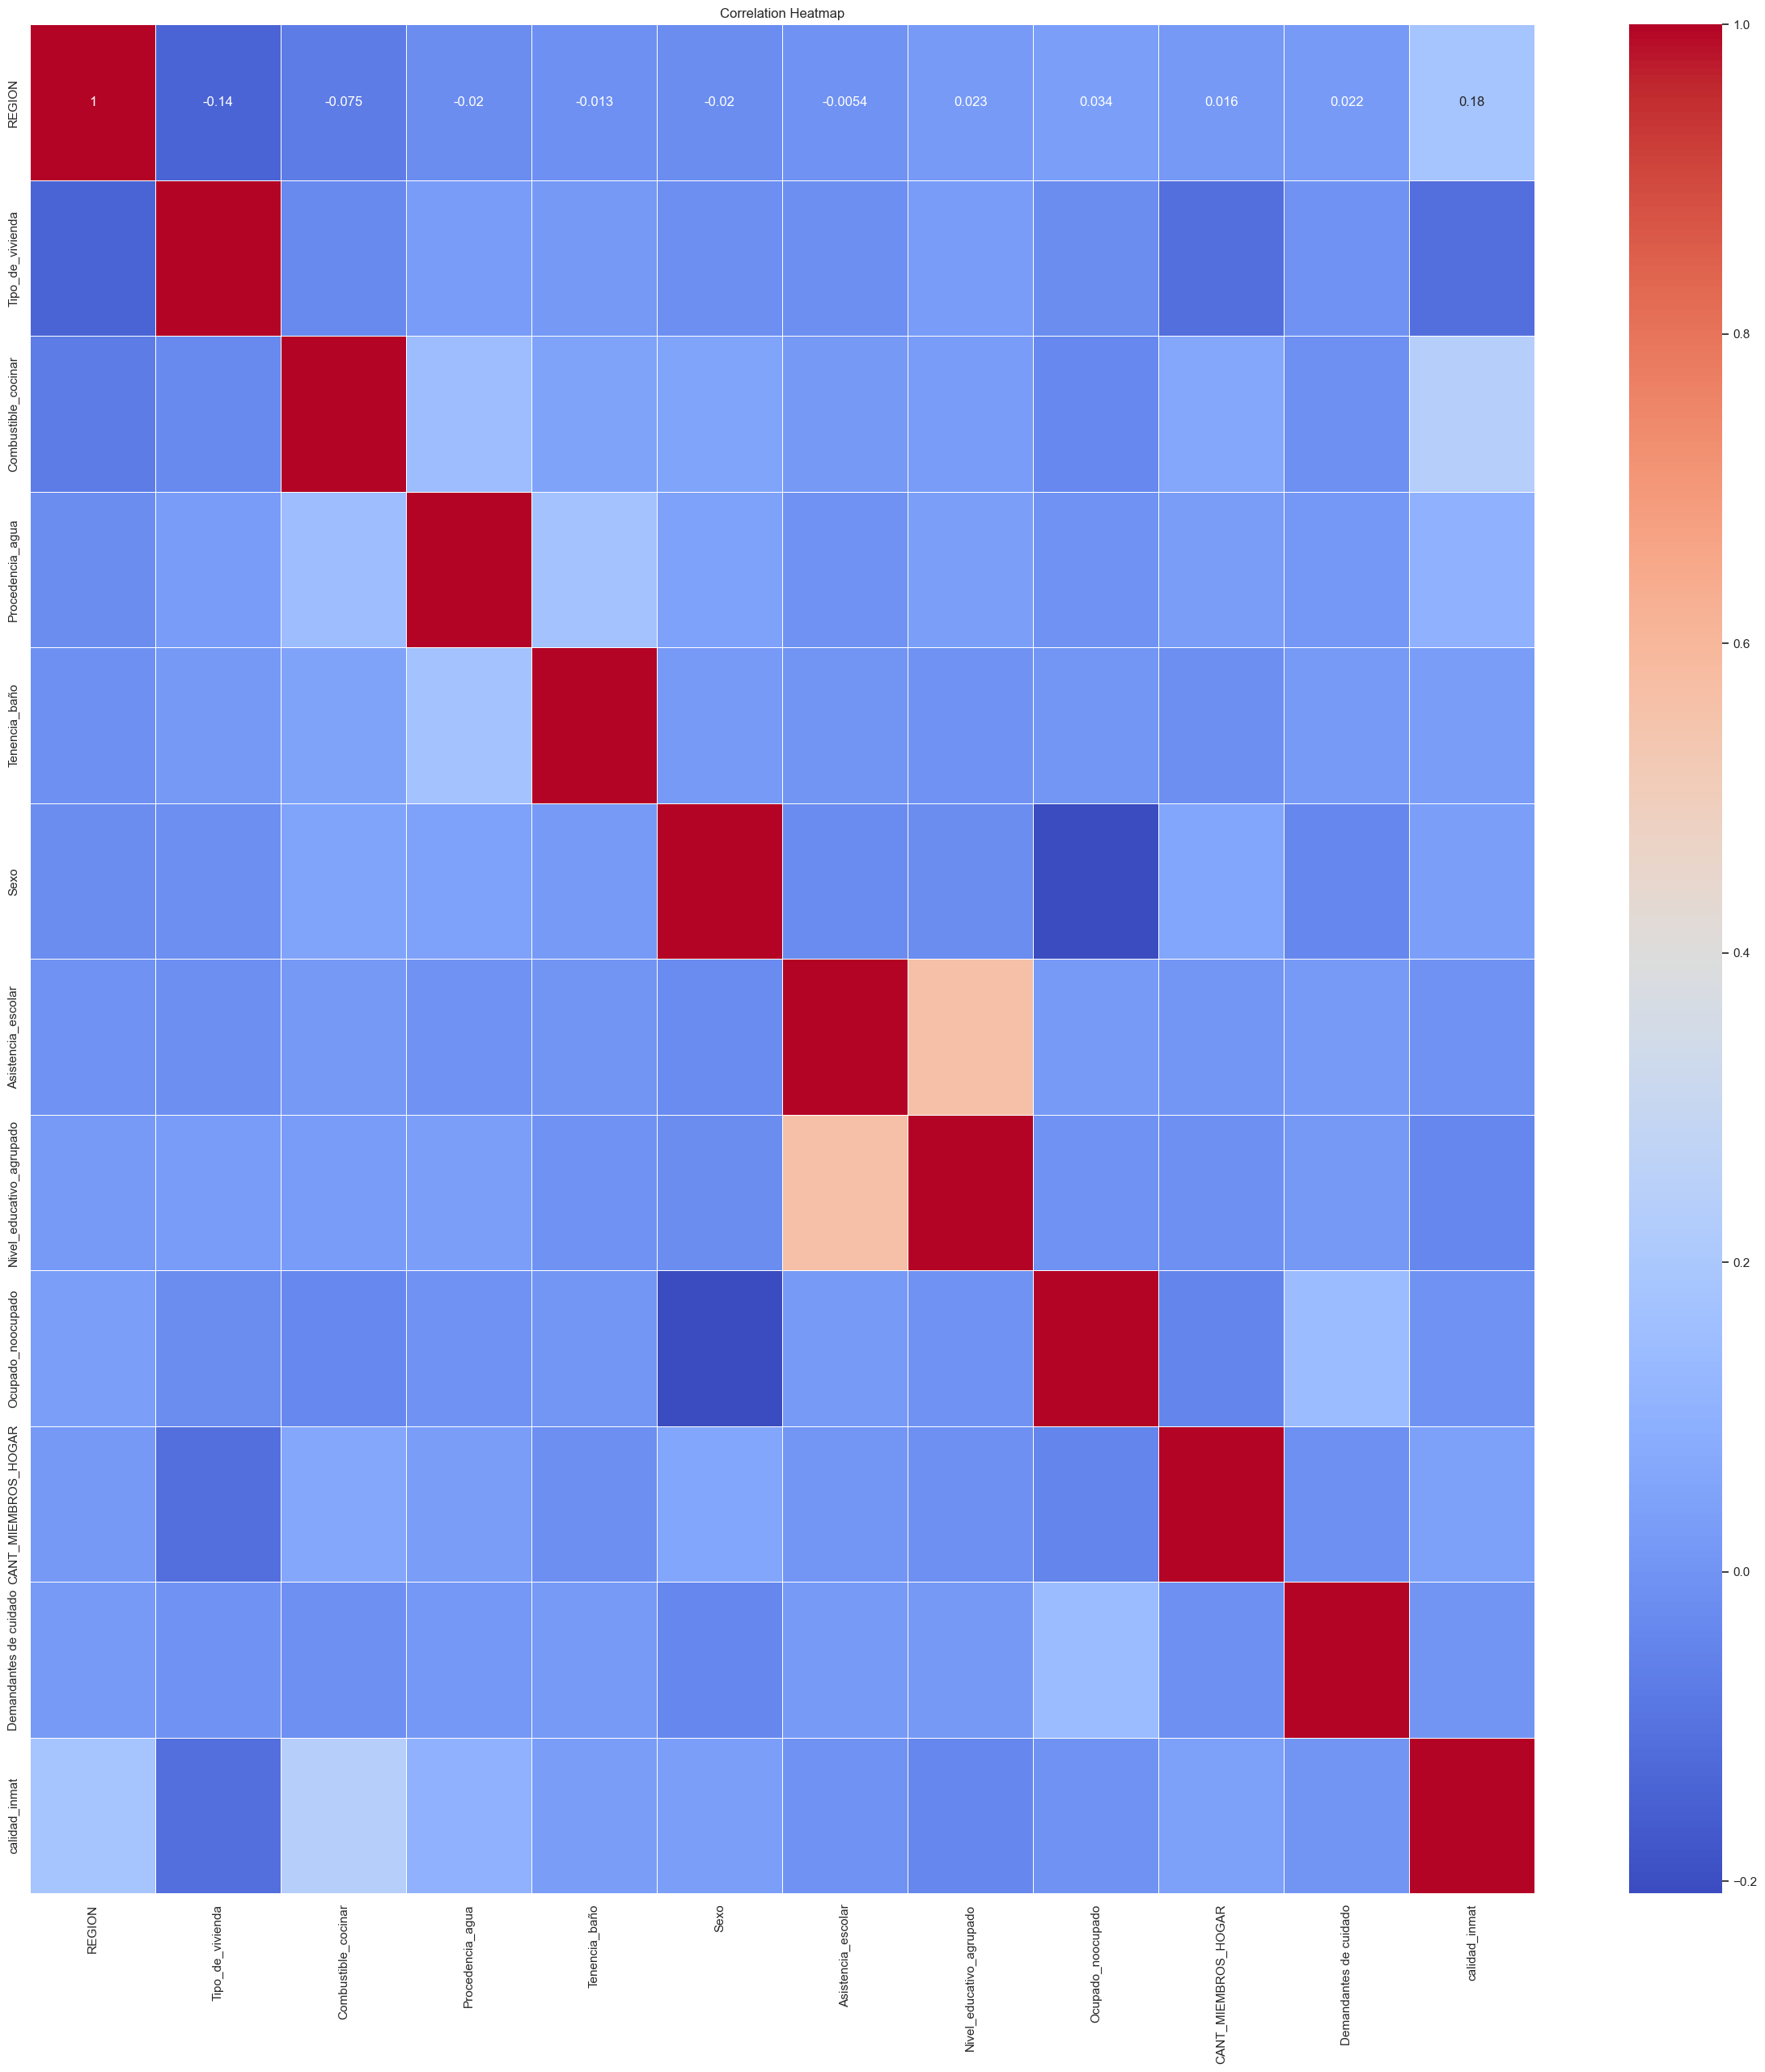

In [154]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

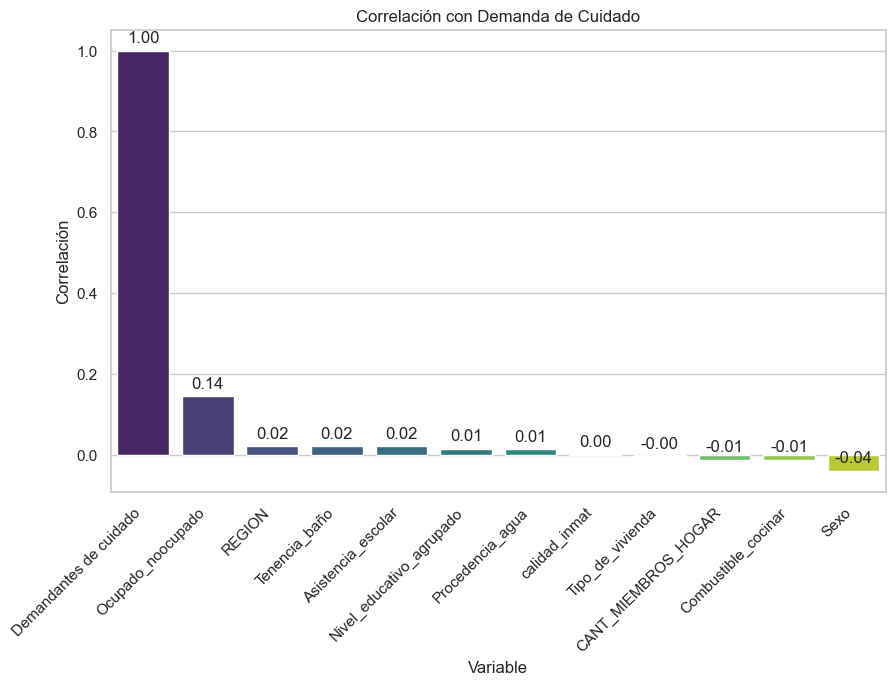

In [155]:
# Ordenamos las correlaciones en orden descendente
correlaciones = correlaciones.sort_values(ascending=False)

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=correlaciones.index, y=correlaciones.values, palette='viridis')

# Agregamos etiquetas a las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# Agregamos títulos y etiquetas
plt.title('Correlación con Demanda de Cuidado')
plt.xlabel('Variable')
plt.ylabel('Correlación')

# Rotamos etiquetas del eje x por si hay muchas variables
plt.xticks(rotation=45, ha='right')

# Mostramos el gráfico
plt.show()


CONVERTIMOS EN CATEGÓRICAS a todas las variables que lo sean

In [157]:
# Listado de columnas categóricas
categorical_cols = ['REGION','Tipo_de_vivienda','Combustible_cocinar','Procedencia_agua','Tenencia_baño','Sexo','Asistencia_escolar','Nivel_educativo_agrupado','calidad_inmat','Ocupado_noocupado']

# Convertimos esas columnas a tipo 'category'
df[categorical_cols] = df[categorical_cols].astype('category')

# Convertimos variables categóricas en dummies
df_dummies = pd.get_dummies(df, drop_first=True)

In [158]:
print(df_dummies.head())

    CANT_MIEMBROS_HOGAR  Demandantes de cuidado  REGION_2  REGION_3  REGION_4  \
9                     1                       0     False     False     False   
19                    1                       0     False     False     False   
20                    3                       0     False     False     False   
28                    2                       0     False     False     False   
29                    1                       0     False     False     False   

    REGION_5  REGION_6  Tipo_de_vivienda_2  Tipo_de_vivienda_3  \
9      False     False               False               False   
19     False     False               False               False   
20     False     False               False               False   
28     False     False               False               False   
29     False     False               False               False   

    Tipo_de_vivienda_4  ...  Asistencia_escolar_3  Asistencia_escolar_99  \
9                 True  ...             

Ahora la regresión logística

In [183]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [190]:
#Reemplazamos espacios por guiones bajos
df.columns = df.columns.str.replace(' ', '_')  # Reemplazar espacios por guiones bajos


In [185]:
# Separamos variables explicativas (X) y la variable objetivo (y)
# Variable dependiente
y = df['Demandantes_de_cuidado']  # Reemplaza con el nombre correcto de tu variable

# Variables independientes
X = df[['REGION', 'Tipo_de_vivienda', 'Combustible_cocinar', 'Procedencia_agua', 
        'Tenencia_baño', 'Sexo', 'Asistencia_escolar', 'Nivel_educativo_agrupado', 
        'Ocupado_noocupado', 'CANT_MIEMBROS_HOGAR', 'calidad_inmat']]

# Agregamos constante para la regresión
X = sm.add_constant(X)  # Necesario para statsmodels


In [186]:
#Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [187]:
#Chequeamos el tipo de las variables de entrenamiento
print(X_train.dtypes)

const                       float64
REGION                        int64
Tipo_de_vivienda              int64
Combustible_cocinar           int64
Procedencia_agua              int64
Tenencia_baño                 int64
Sexo                          int64
Asistencia_escolar            int64
Nivel_educativo_agrupado      int64
Ocupado_noocupado             int64
CANT_MIEMBROS_HOGAR           int64
calidad_inmat                 int64
dtype: object


In [188]:
frecuencia_y = y.value_counts()
print(frecuencia_y)


Demandantes_de_cuidado
0    3392
1     322
Name: count, dtype: int64


In [189]:
import pandas as pd
from io import StringIO

# Creamos un buffer para capturar la salida
buffer = StringIO()

# Capturamos la salida de X.info() en el buffer
X.info(buf=buffer)

# Leemos la información como un DataFrame
info_str = buffer.getvalue()

# Mostramos la salida capturada
print(info_str)



<class 'pandas.core.frame.DataFrame'>
Index: 3714 entries, 9 to 14348
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     3714 non-null   float64
 1   REGION                    3714 non-null   int64  
 2   Tipo_de_vivienda          3714 non-null   int64  
 3   Combustible_cocinar       3714 non-null   int64  
 4   Procedencia_agua          3714 non-null   int64  
 5   Tenencia_baño             3714 non-null   int64  
 6   Sexo                      3714 non-null   int64  
 7   Asistencia_escolar        3714 non-null   int64  
 8   Nivel_educativo_agrupado  3714 non-null   int64  
 9   Ocupado_noocupado         3714 non-null   int64  
 10  CANT_MIEMBROS_HOGAR       3714 non-null   int64  
 11  calidad_inmat             3714 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 377.2 KB



In [191]:
# Convertimos a arrays de NumPy (opcional pero recomendado)
X = np.asarray(X, dtype=np.float64)
y = np.asarray(y, dtype=np.float64)

# Añadimos constante
X = sm.add_constant(X)

# Ajustamos el modelo
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.280946
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3714
Model:                          Logit   Df Residuals:                     3702
Method:                           MLE   Df Model:                           11
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                 0.04710
Time:                        19:16:02   Log-Likelihood:                -1043.4
converged:                       True   LL-Null:                       -1095.0
Covariance Type:            nonrobust   LLR p-value:                 4.229e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7638      1.002     -6.750      0.000      -8.728      -4.800
x1             0.0351      0.

In [192]:
# Extraemos los coeficientes, errores estándar y valores p
summary_table = pd.DataFrame({
    'Coeficiente': result.params,
    'Error estándar': result.bse,
    'Valor p': result.pvalues
})

# Mostramos la tabla
print(summary_table)

    Coeficiente  Error estándar       Valor p
0     -6.763798        1.002047  1.478683e-11
1      0.035146        0.035728  3.252584e-01
2     -0.002522        0.054463  9.630718e-01
3     -0.058829        0.120913  6.265847e-01
4      0.317058        0.379365  4.032913e-01
5      0.875662        0.818782  2.848586e-01
6     -0.078688        0.126723  5.346380e-01
7      0.007923        0.015789  6.158278e-01
8      0.002915        0.010622  7.837800e-01
9      1.788157        0.235860  3.417506e-14
10    -0.018917        0.051371  7.126961e-01
11    -0.005967        0.067666  9.297334e-01


In [193]:
# Exportamos la tabla a un archivo CSV
summary_table.to_csv('Resultado_modelo_logit.csv', index=True)

In [194]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [195]:
# Creamos el modelo de regresión logística
model_sklearn = LogisticRegression()

In [196]:
# Ajustamos el modelo
model_sklearn.fit(X_train, y_train)

c:\Users\UsuarioFundar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [197]:
# Realizamos predicciones
y_pred = model_sklearn.predict(X_test)

# Imprimimos el reporte de clasificación
print(classification_report(y_test, y_pred))

# Imprimimos la matriz de confusión
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1027
         1.0       0.00      0.00      0.00        88

    accuracy                           0.92      1115
   macro avg       0.46      0.50      0.48      1115
weighted avg       0.85      0.92      0.88      1115

[[1027    0]
 [  88    0]]


c:\Users\UsuarioFundar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\UsuarioFundar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\UsuarioFundar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos el modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=42) # Puedes ajustar hiperparámetros aquí

# Entrenamos el modelo
random_forest_model.fit(X_train, y_train)

# Realizamos predicciones
y_pred_rf = random_forest_model.predict(X_test)

# Evaluamos el modelo
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1027
         1.0       0.04      0.01      0.02        88

    accuracy                           0.90      1115
   macro avg       0.48      0.49      0.48      1115
weighted avg       0.85      0.90      0.88      1115

[[1005   22]
 [  87    1]]


In [205]:
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)
    

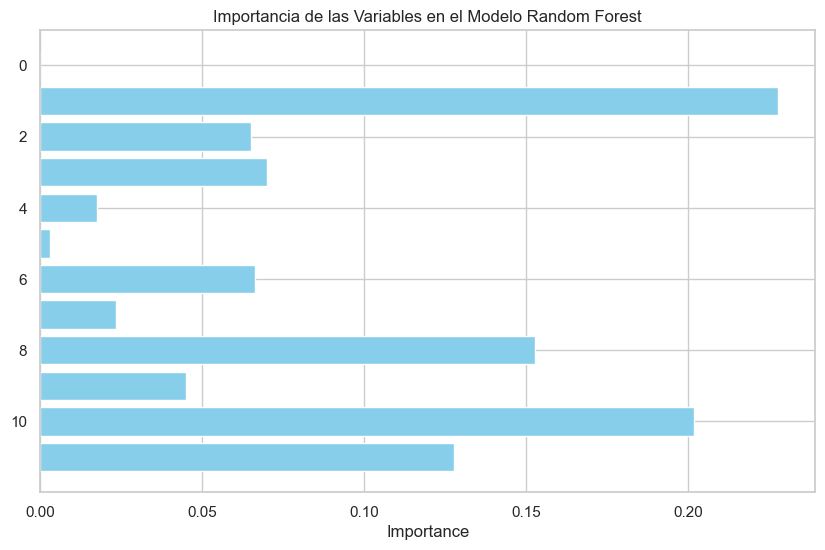

In [206]:
# Obtener la importancia de las variables
importances = random_forest_model.feature_importances_

# Crear un DataFrame con las importancias y las variables
feature_names = X.columns  # Asegúrate de que X es un DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar las importancias de mayor a menor
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las variables
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Importancia de las Variables en el Modelo Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la más importante arriba
plt.show()


In [207]:
# COnvertimos y_test a un array de NumPy
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.values

# Ahora armamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)


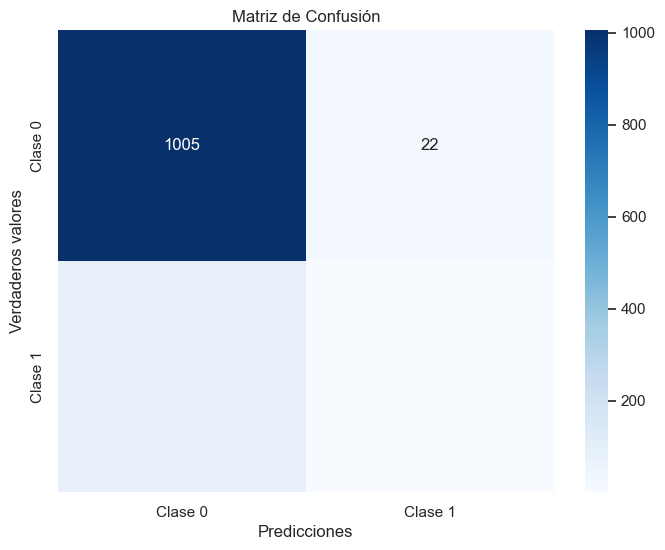

In [208]:
import seaborn as sns

# Graficamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos valores')
plt.show()


    Feature  Importance
1         1    0.227706
10       10    0.201835
8         8    0.152568
11       11    0.127598
3         3    0.069868
6         6    0.066312
2         2    0.065125
9         9    0.045107
7         7    0.023373
4         4    0.017625


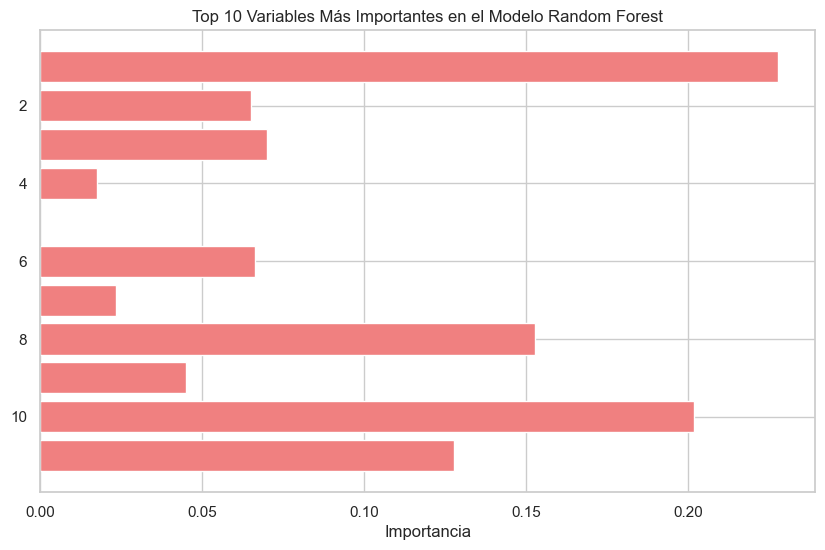

In [209]:
# Vemos las 10 principales variables según la importancia
print(importance_df.head(10))

# Graficamos las 10 principales variables más importantes
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='lightcoral')
plt.xlabel('Importancia')
plt.title('Top 10 Variables Más Importantes en el Modelo Random Forest')
plt.gca().invert_yaxis()
plt.show()
